In [1]:
import NX5352
import os
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

p = NX5352.NX5352("data")

(array([93316.,     0.,     0.,     0.,     0.,  4308.,     0.,     0.,
            0.,  1032.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

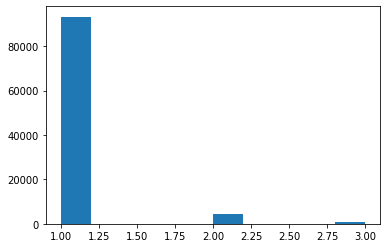

In [2]:
d_u, d_u_count = p.get_domains_per_user()
plt.hist(list(d_u_count.values()))

(array([89056.,     0.,     0.,     0.,     0.,  7135.,     0.,     0.,
            0.,  8837.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

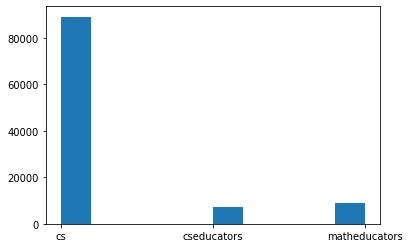

In [3]:
u_d = p.get_users_per_domain()
k, v = list(u_d.keys()), list(u_d.values())
plt.hist(k, weights=v)

In [4]:
u_map = p.get_user_map()
z = p.get_user_domain_participation_edgelist(u_map, d_u_count)

In [9]:
G = nx.Graph()
G.add_edges_from(z)
nx.write_gml(G, "demograph.gml")